In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the folder containing CSV files
csv_folder = '../results/csv/'

# Initialize arrays to store the results
run_arr = []
dadca_ack_arr = []
network_arr = []
repetition_arr = []
num_uavs_arr = []
uavs_arr = []
numFailuresUAV1_arr = []
numFailuresUAV2_arr = []
gs_data_received_max_arr = []
failureDuration_arr = []


# Function to parse a CSV file and extract the desired data
def parse_csv_file(file_path):
    with open(file_path, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Skip the header row

        f_run = None
        f_dadca_ack = False
        f_network = None
        f_repetition = None
        f_num_uavs = None
        f_uavs = {}
        f_numFailuresUAV1 = None
        f_numFailuresUAV2 = None
        f_gs_data_received_max = None
        f_failureDuration = None
        
        for row in reader:
            run, data_type, module, name, attrname, attrvalue, value, *_ = row

            if data_type == 'runattr':
                if attrname == 'network':
                    f_network = attrvalue
                elif attrname == 'repetition':
                    f_repetition = attrvalue
            elif data_type == 'itervar':
                if attrname == 'numFailuresUAV1':
                    f_numFailuresUAV1 = attrvalue
                elif attrname == 'numFailuresUAV2':
                    f_numFailuresUAV2 = attrvalue
                elif attrname == 'failureDuration':
                    f_failureDuration = attrvalue
            elif data_type == 'param':
                if attrname == '*.numUAVs':
                    f_num_uavs = attrvalue
                elif attrname == '*.quads[*].protocol.typename' and "DadcaAckUAVProtocol" in attrvalue:
                    f_dadca_ack = True
            elif data_type == 'scalar':
                if (name == 'bufferLoad:max' or name == 'bufferLoad:mean' or name == 'dataReceived:max' or name == 'dataReceived:mean') and 'quads' in module:
                    f_run = run
                    if not module in f_uavs:
                        f_uavs[module] = {name: float(value)}
                    else:
                        f_uavs[module][name] = float(value)
                elif name == 'dataReceived:max' and 'groundStation' in module:
                    f_gs_data_received_max = int(value)
        
        run_arr.append(f_run)
        dadca_ack_arr.append(f_dadca_ack)
        network_arr.append(f_network)
        repetition_arr.append(int(f_repetition))
        num_uavs_arr.append(int(f_num_uavs))
        uavs_arr.append(f_uavs)
        numFailuresUAV1_arr.append(int(f_numFailuresUAV1))
        #numFailuresUAV2_arr.append(int(f_numFailuresUAV2))
        gs_data_received_max_arr.append(f_gs_data_received_max)
        failureDuration_arr.append(f_failureDuration)
        
files = os.listdir(csv_folder)
n = len(files)
# Loop through all CSV files in the folder
i = 0
for filename in files:
    if filename.endswith(".csv"):
        print('Parsing file %d of %d (%.2f complete)' % (i, n, i/n*100), end='\r')
        file_path = os.path.join(csv_folder, filename)
        parse_csv_file(file_path)
    i += 1

# Initialize a dictionary to store the results
result_map = {
            "run": run_arr,
            "dadca_ack": dadca_ack_arr,
            "network": network_arr,
            "repetition": repetition_arr,
            "num_uavs": num_uavs_arr,
            "uavs": uavs_arr,
            "numFailuresUAV1": numFailuresUAV1_arr,
            #"numFailuresUAV2": numFailuresUAV2_arr,
            "failureDuration": failureDuration_arr,
            "gs_data_received_max": gs_data_received_max_arr
        }

In [2]:
df = pd.DataFrame(result_map)

In [3]:
df


,run,dadca_ack,network,repetition,num_uavs,uavs,numFailuresUAV1,failureDuration,gs_data_received_max
0,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-1-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,0,36000s,3349882
1,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-0-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,0,3600s,3311554
2,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-3-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,1,36000s,3318668
3,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-2-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,1,3600s,3342298
4,DADCA_ACK_n100_u16_a8000m2_0-DADCA-1-20240121-...,False,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,0,36000s,3645663
...,...,...,...,...,...,...,...,...,...
115,DADCA_ACK_n50_u8_a8000m2_0-DADCA-ACK-2-2024012...,True,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,1,3600s,1714727
116,DADCA_ACK_n50_u8_a8000m2_0-DADCA-1-20240121-16...,False,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,0,36000s,1809300
117,DADCA_ACK_n50_u8_a8000m2_0-DADCA-0-20240121-15...,False,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,0,3600s,1883567
118,DADCA_ACK_n50_u8_a8000m2_0-DADCA-3-20240121-16...,False,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,1,36000s,1872578


In [4]:
# Assuming 'run' column contains the run IDs
df['num_sensors'] = df['run'].str.split('_').str[2]

# Convert the 'num_sensors' column to integer type
df['num_sensors'] = df['num_sensors'].str[1:].astype(int)

# Calculate 'total_failures' as the sum of 'numFailuresUAV1' #and 'numFailuresUAV2'
df['total_failures'] = df['numFailuresUAV1'] #+ df['numFailuresUAV2']


In [5]:
df

,run,dadca_ack,network,repetition,num_uavs,uavs,numFailuresUAV1,failureDuration,gs_data_received_max,num_sensors,total_failures
0,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-1-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,0,36000s,3349882,100,0
1,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-0-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,0,3600s,3311554,100,0
2,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-3-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,1,36000s,3318668,100,1
3,DADCA_ACK_n100_u16_a8000m2_0-DADCA-ACK-2-20240...,True,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,1,3600s,3342298,100,1
4,DADCA_ACK_n100_u16_a8000m2_0-DADCA-1-20240121-...,False,DADCA_ACK_n100_u16_a8000m2_0,0,16,{'DADCA_ACK_n100_u16_a8000m2_0.quads[0].protoc...,0,36000s,3645663,100,0
...,...,...,...,...,...,...,...,...,...,...,...
115,DADCA_ACK_n50_u8_a8000m2_0-DADCA-ACK-2-2024012...,True,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,1,3600s,1714727,50,1
116,DADCA_ACK_n50_u8_a8000m2_0-DADCA-1-20240121-16...,False,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,0,36000s,1809300,50,0
117,DADCA_ACK_n50_u8_a8000m2_0-DADCA-0-20240121-15...,False,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,0,3600s,1883567,50,0
118,DADCA_ACK_n50_u8_a8000m2_0-DADCA-3-20240121-16...,False,DADCA_ACK_n50_u8_a8000m2_0,0,8,{'DADCA_ACK_n50_u8_a8000m2_0.quads[0].protocol...,1,36000s,1872578,50,1


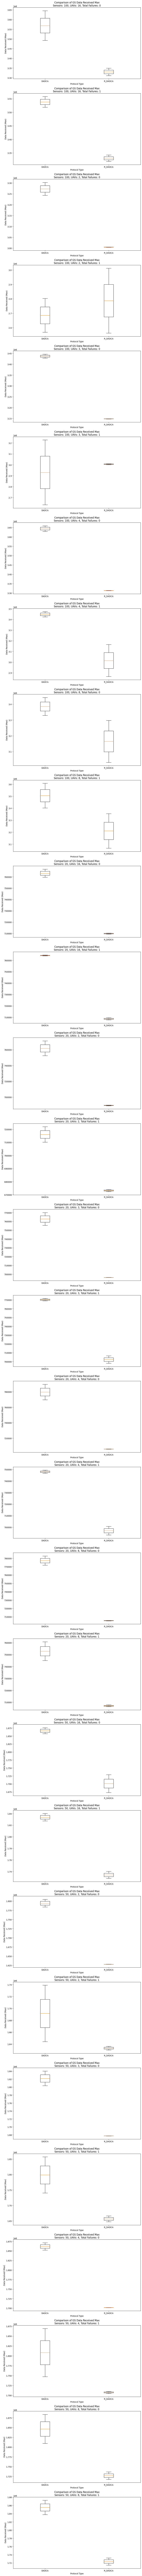

In [6]:
# Create a list of unique combinations of 'num_sensors', 'num_uavs', and 'total_failures'
combinations = df[['num_sensors', 'num_uavs', 'total_failures']].drop_duplicates()

# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=len(combinations), ncols=1, figsize=(10, 6 * len(combinations)))

# Loop through each combination and create plots
i = 0
for _, row in combinations.iterrows():
    num_sensors = row['num_sensors']
    num_uavs = row['num_uavs']
    total_failures = row['total_failures']
    
    # Filter the DataFrame for the current combination
    filtered_df = df[(df['num_sensors'] == num_sensors) & (df['num_uavs'] == num_uavs) & (df['total_failures'] == total_failures)]
    
    # Separate DataFrames for dadca and dadca_ack
    tdadca = filtered_df[filtered_df['dadca_ack'] == False]['gs_data_received_max']
    tdadca_ack = filtered_df[filtered_df['dadca_ack'] == True]['gs_data_received_max']
    
    # Create a box plot for the current combination
    axes[i].boxplot([tdadca, tdadca_ack], labels=['DADCA', 'R_DADCA'])
    axes[i].set_title(f'Comparison of GS Data Received Max\nSensors: {num_sensors}, UAVs: {num_uavs}, Total Failures: {total_failures}')
    axes[i].set_ylabel('Data Received (Max)')
    axes[i].set_xlabel('Protocol Type')
    i += 1
    
# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()

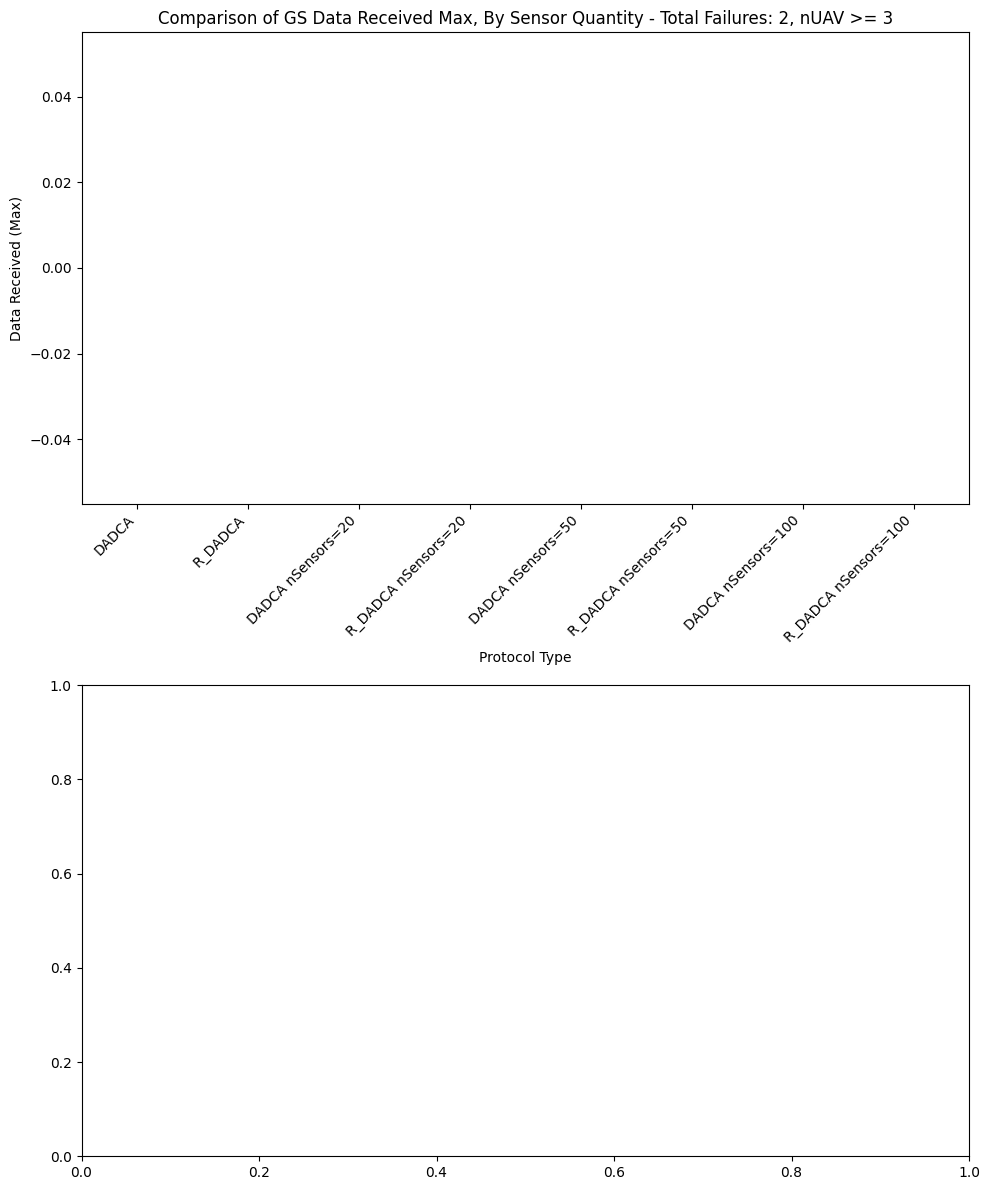

In [7]:
# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6 * 2))

numFailures = 2

# Filter the DataFrame for the current combination
filtered_df = df[(df['num_sensors'] > 0) & (df['num_uavs'] > 2) & (df['total_failures'] == numFailures)]

# Separate DataFrames for dadca and dadca_ack
tdadca = filtered_df[filtered_df['dadca_ack'] == False]['gs_data_received_max']
tdadca_ack = filtered_df[filtered_df['dadca_ack'] == True]['gs_data_received_max']

distinctUavCount = [3,4,8,16]
distinctSensorCount = [20, 50, 100]

data = [tdadca,tdadca_ack]
labels = ['DADCA', 'R_DADCA']

for i in distinctSensorCount:
    tempdadca = filtered_df[(filtered_df['dadca_ack'] == False) & (filtered_df['num_sensors'] == i)]['gs_data_received_max']
    data.append(tempdadca)
    labels.append('DADCA nSensors=%d' % (i))
    
    tempdadca_ack = filtered_df[(filtered_df['dadca_ack'] == True) & (filtered_df['num_sensors'] == i)]['gs_data_received_max']
    data.append(tempdadca_ack)
    labels.append('R_DADCA nSensors=%d' % (i))
    
# Create a box plot for the current combination
axes[0].boxplot(data, labels=labels)
axes[0].set_title(f'Comparison of GS Data Received Max, By Sensor Quantity - Total Failures: %d, nUAV >= 3' % numFailures)
axes[0].set_ylabel('Data Received (Max)')
axes[0].set_xlabel('Protocol Type')
axes[0].set_xticklabels(labels, rotation=45, ha='right')
    
# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()

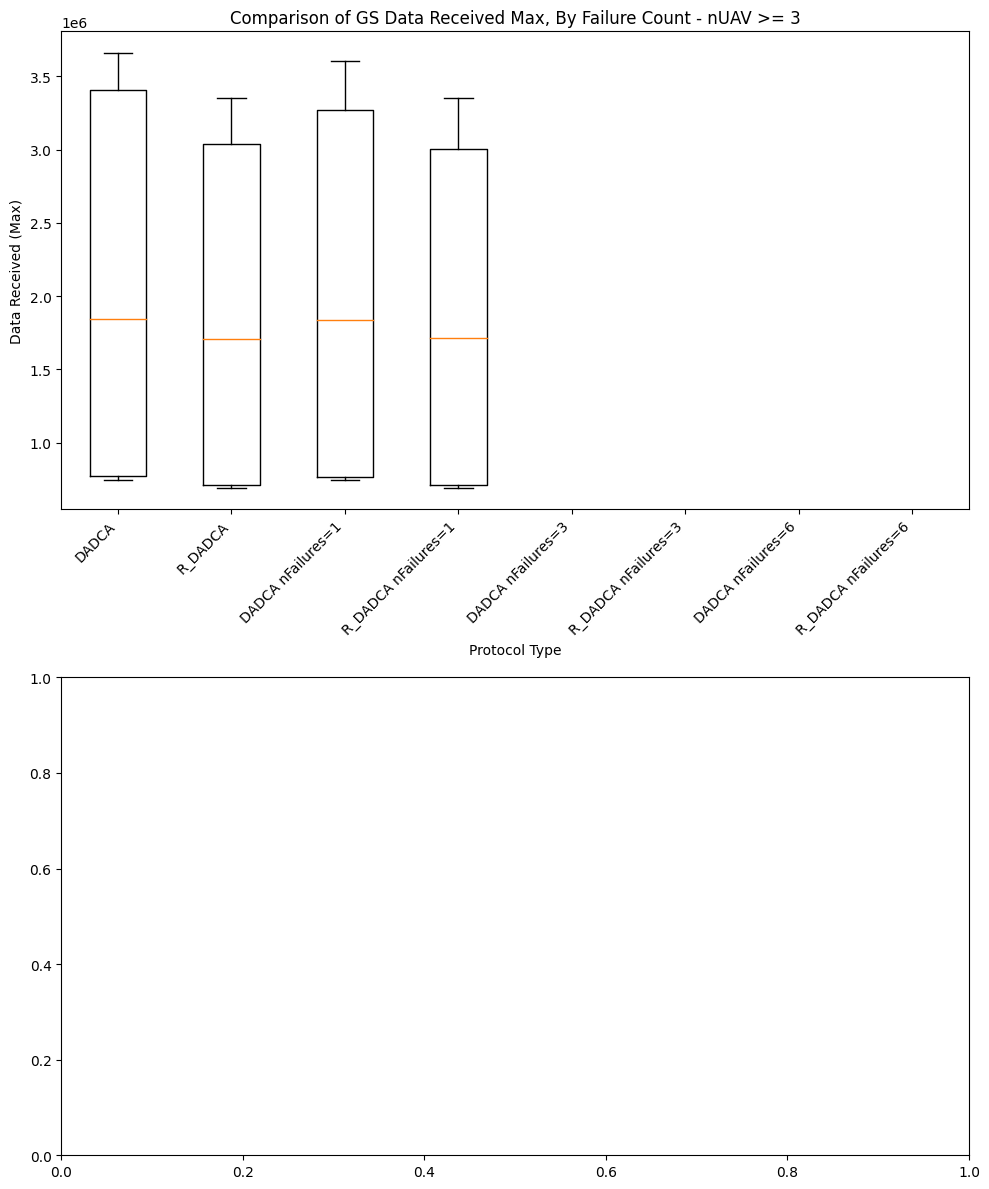

In [8]:
# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6 * 2))

# Filter the DataFrame for the current combination
filtered_df = df[(df['num_sensors'] > 0) & (df['num_uavs'] >= 3) & (df['total_failures'] >= 0)]

# Separate DataFrames for dadca and dadca_ack
tdadca = filtered_df[filtered_df['dadca_ack'] == False]['gs_data_received_max']
tdadca_ack = filtered_df[filtered_df['dadca_ack'] == True]['gs_data_received_max']

distinctUavCount = [3,4,8,16]
distinctSensorCount = [20, 50, 100]
distinctFailureCount = [1, 3, 6]

data = [tdadca,tdadca_ack]
labels = ['DADCA', 'R_DADCA']

for i in distinctFailureCount:
    tempdadca = filtered_df[(filtered_df['dadca_ack'] == False) & (filtered_df['total_failures'] == i)]['gs_data_received_max']
    data.append(tempdadca)
    labels.append('DADCA nFailures=%d' % (i))
    
    tempdadca_ack = filtered_df[(filtered_df['dadca_ack'] == True) & (filtered_df['total_failures'] == i)]['gs_data_received_max']
    data.append(tempdadca_ack)
    labels.append('R_DADCA nFailures=%d' % (i))
    
# Create a box plot for the current combination
axes[0].boxplot(data, labels=labels)
axes[0].set_title(f'Comparison of GS Data Received Max, By Failure Count - nUAV >= 3')
axes[0].set_ylabel('Data Received (Max)')
axes[0].set_xlabel('Protocol Type')
axes[0].set_xticklabels(labels, rotation=45, ha='right')
    
# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()

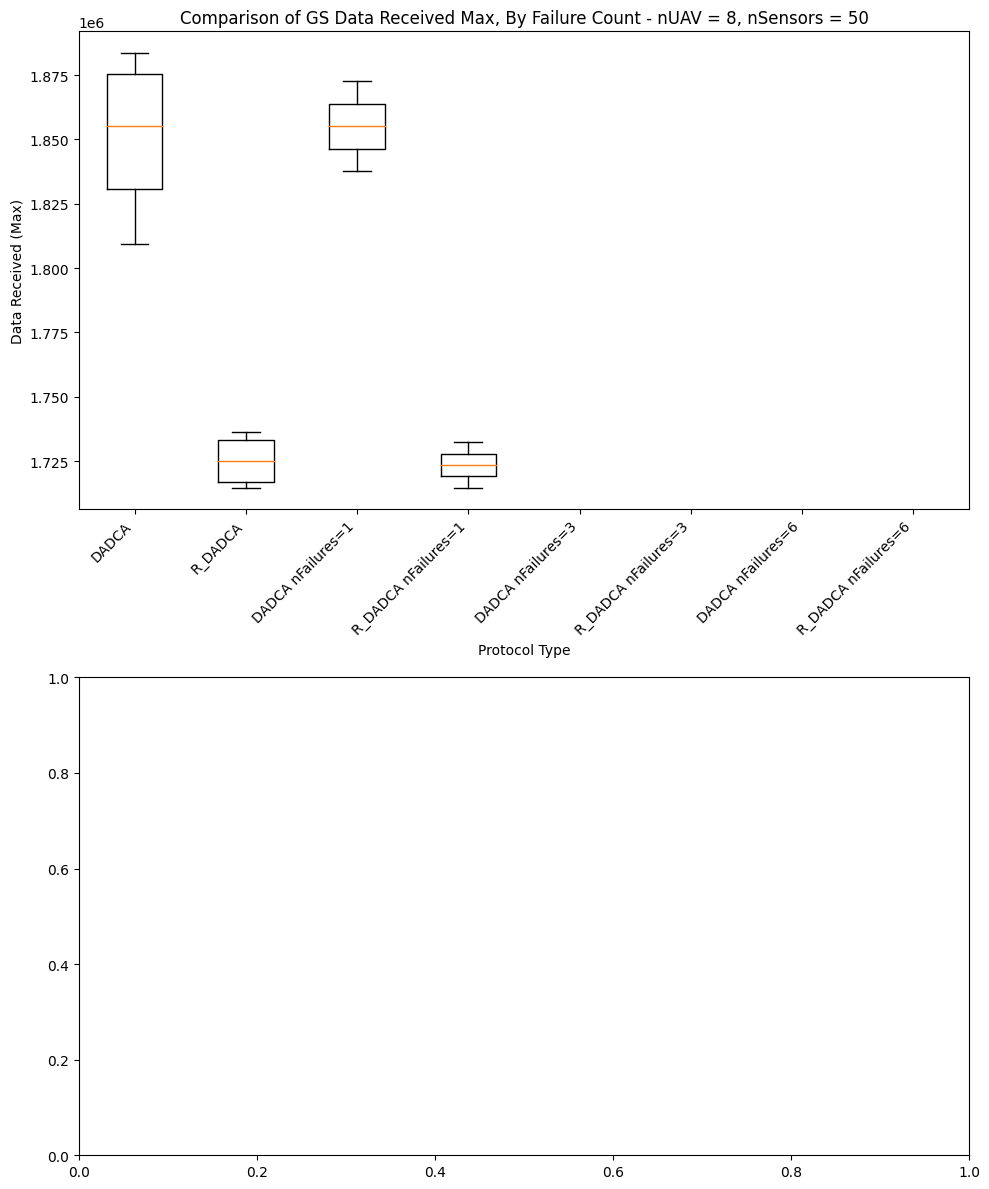

In [9]:
# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6 * 2))

# Filter the DataFrame for the current combination
filtered_df = df[(df['num_sensors'] == 50) & (df['num_uavs'] == 8) & (df['total_failures'] >= 0)]

# Separate DataFrames for dadca and dadca_ack
tdadca = filtered_df[filtered_df['dadca_ack'] == False]['gs_data_received_max']
tdadca_ack = filtered_df[filtered_df['dadca_ack'] == True]['gs_data_received_max']

distinctUavCount = [3,4,8,16]
distinctSensorCount = [20, 50, 100]
distinctFailureCount = [1, 3, 6]

data = [tdadca,tdadca_ack]
labels = ['DADCA', 'R_DADCA']

for i in distinctFailureCount:
    tempdadca = filtered_df[(filtered_df['dadca_ack'] == False) & (filtered_df['total_failures'] == i)]['gs_data_received_max']
    data.append(tempdadca)
    labels.append('DADCA nFailures=%d' % (i))
    
    tempdadca_ack = filtered_df[(filtered_df['dadca_ack'] == True) & (filtered_df['total_failures'] == i)]['gs_data_received_max']
    data.append(tempdadca_ack)
    labels.append('R_DADCA nFailures=%d' % (i))
    
# Create a box plot for the current combination
axes[0].boxplot(data, labels=labels)
axes[0].set_title(f'Comparison of GS Data Received Max, By Failure Count - nUAV = 8, nSensors = 50')
axes[0].set_ylabel('Data Received (Max)')
axes[0].set_xlabel('Protocol Type')
axes[0].set_xticklabels(labels, rotation=45, ha='right')
    
# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()

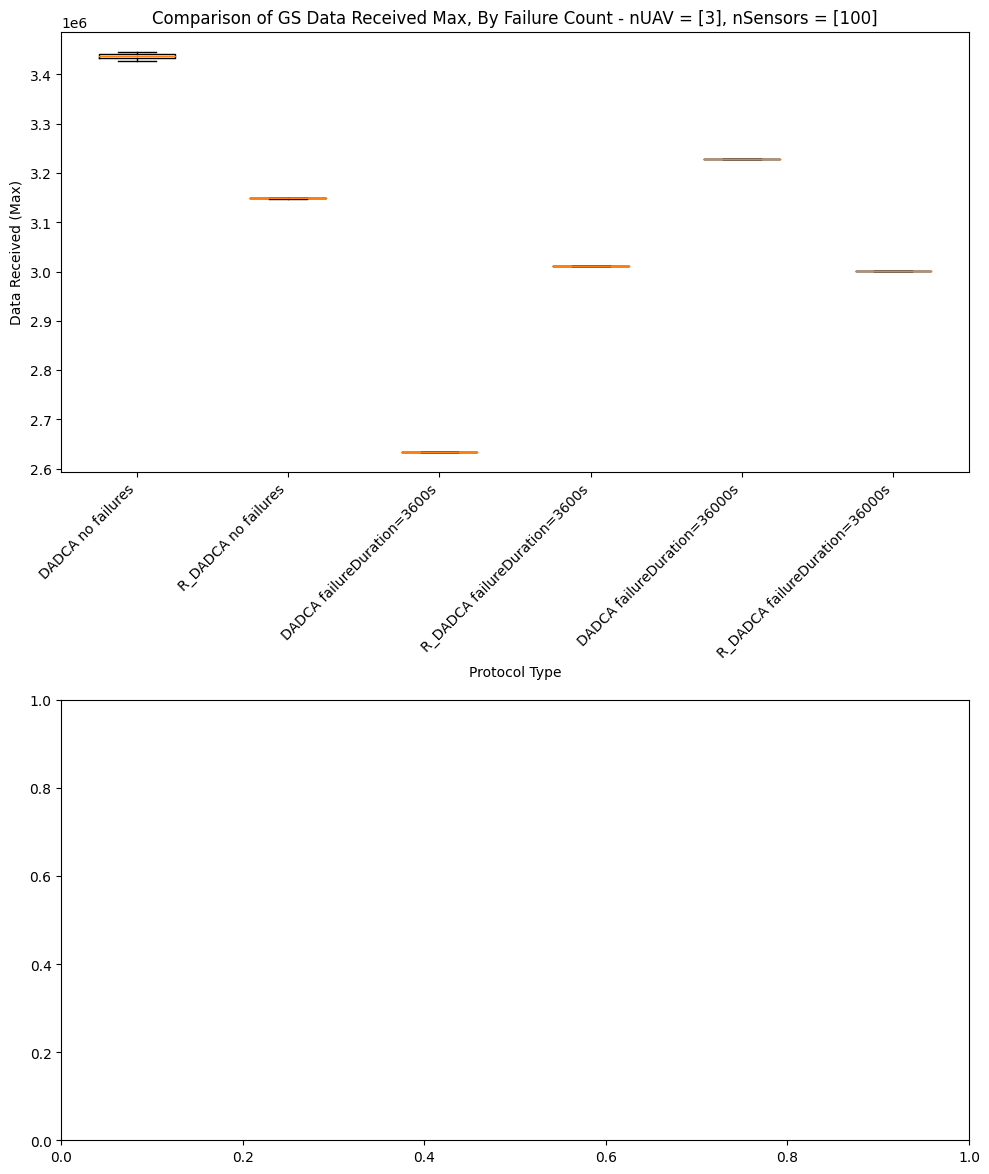

In [10]:
# Create subplots for multiple box plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6 * 2))

#distinctUavCount = [3,4,8,16]
#distinctSensorCount = [20, 50, 100]
nUAVs = [3]
nSensors = [100]

# Filter the DataFrame for the current combination
filtered_df = df[(df['num_sensors'].isin(nSensors)) & (df['num_uavs'].isin(nUAVs)) & (df['total_failures'] >= 0)]

# Separate DataFrames for dadca and dadca_ack
tdadca = filtered_df[filtered_df['dadca_ack'] == False]['gs_data_received_max']
tdadca_ack = filtered_df[filtered_df['dadca_ack'] == True]['gs_data_received_max']

distinctFailureDuration = ["3600s", "36000s"]

#data = [tdadca,tdadca_ack]
#labels = ['DADCA', 'R_DADCA']
data = []
labels = []

tempdadca = filtered_df[(filtered_df['dadca_ack'] == False) & (filtered_df['numFailuresUAV1'] == 0)]['gs_data_received_max']
data.append(tempdadca)
labels.append('DADCA no failures')

tempdadca_ack = filtered_df[(filtered_df['dadca_ack'] == True) & (filtered_df['numFailuresUAV1'] == 0)]['gs_data_received_max']
data.append(tempdadca_ack)
labels.append('R_DADCA no failures')

for i in distinctFailureDuration:
    tempdadca = filtered_df[(filtered_df['dadca_ack'] == False) & (filtered_df['numFailuresUAV1'] > 0) & (filtered_df['failureDuration'] == i)]['gs_data_received_max']
    data.append(tempdadca)
    labels.append('DADCA failureDuration=%s' % (i))
    
    tempdadca_ack = filtered_df[(filtered_df['dadca_ack'] == True) & (filtered_df['numFailuresUAV1'] > 0) & (filtered_df['failureDuration'] == i)]['gs_data_received_max']
    data.append(tempdadca_ack)
    labels.append('R_DADCA failureDuration=%s' % (i))
    
# Create a box plot for the current combination
axes[0].boxplot(data, labels=labels)
axes[0].set_title(f'Comparison of GS Data Received Max, By Failure Count - nUAV = %s, nSensors = %s' % (str(nUAVs), str(nSensors)))
axes[0].set_ylabel('Data Received (Max)')
axes[0].set_xlabel('Protocol Type')
axes[0].set_xticklabels(labels, rotation=45, ha='right')
    
# Adjust subplot layout
plt.tight_layout()

# Show the box plots
plt.show()